Support Vector Machines:
- 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Dataset/ICP_Residential_Austin2017up.csv')
# Choosing the columns
data_columns_for_pca = data[["Permit Type Desc", "Permit Class Mapped","Permit Class","Work Class", "Condominium",
'Remodel Repair SQFT', 'Total New Add SQFT','Total Valuation Remodel', 'Number Of Floors', 'Total Job Valuation',
'Total Lot SQFT']]

#Replacing the empty space with NaN and then deleting all the NaN
data_columns_for_pca = data_columns_for_pca.replace(r'^s*$', float('NaN'))
data_columns_for_pca.dropna(inplace = True)

#Selecting the columns that are categorical and converting it into numerical 
cate_columns = data_columns_for_pca.select_dtypes(['object']).columns
data_columns_for_pca[cate_columns] = data_columns_for_pca[cate_columns].apply(lambda x: pd.factorize(x)[0])

data_target = data_columns_for_pca['Total Job Valuation']
data_columns_for_pca.drop(columns='Total Job Valuation', inplace=True)


X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(data_columns_for_pca, data_target, test_size=0.8, train_size=0.2, random_state=None)


In [3]:
dt_max4 = DecisionTreeRegressor(max_depth=4)
dt_max3 = DecisionTreeRegressor(max_depth=3)
dt_max4.fit(X_train_dt, y_train_dt)
dt_max3.fit(X_train_dt, y_train_dt)

DecisionTreeRegressor(max_depth=3)

In [8]:
y_dt_max3 = dt_max3.predict(X_test_dt)
y_dt_max4 = dt_max4.predict(X_test_dt)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


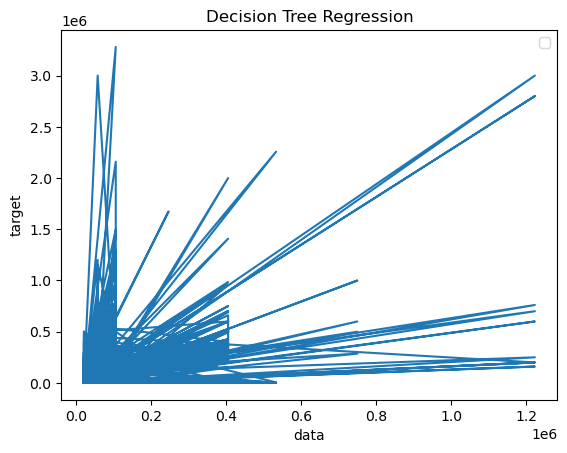

[Text(0.5, 0.875, 'X[7] <= 149500.0\nsquared_error = 14626827183.605\nsamples = 1363\nvalue = 57278.207'),
 Text(0.25, 0.625, 'X[6] <= 679.0\nsquared_error = 12018404416.235\nsamples = 1333\nvalue = 50951.61'),
 Text(0.125, 0.375, 'X[5] <= 515.5\nsquared_error = 5271146728.916\nsamples = 1048\nvalue = 34762.402'),
 Text(0.0625, 0.125, 'squared_error = 1677971841.133\nsamples = 660\nvalue = 21229.732'),
 Text(0.1875, 0.125, 'squared_error = 10541836260.787\nsamples = 388\nvalue = 57781.892'),
 Text(0.375, 0.375, 'X[6] <= 5053.5\nsquared_error = 32321694592.465\nsamples = 285\nvalue = 110482.453'),
 Text(0.3125, 0.125, 'squared_error = 24691140566.315\nsamples = 282\nvalue = 105984.032'),
 Text(0.4375, 0.125, 'squared_error = 568888177778.0\nsamples = 3\nvalue = 533334.0'),
 Text(0.75, 0.625, 'X[5] <= 3813.0\nsquared_error = 49725424233.333\nsamples = 30\nvalue = 338390.0'),
 Text(0.625, 0.375, 'X[7] <= 216000.0\nsquared_error = 17135658201.531\nsamples = 28\nvalue = 292096.429'),
 Text(

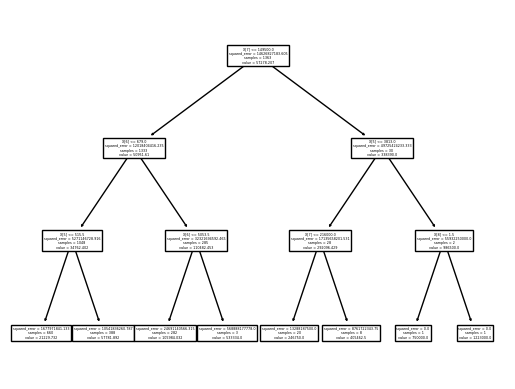

In [7]:
tree.plot_tree(dt_max3)